Inicio de Panas y sus apuntes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Iniciamos con una coleccion.

In [4]:
frutas=["naranjas", "manzanas", "uvas", "peras", "mangos"]

print(frutas)

['naranjas', 'manzanas', 'uvas', 'peras', 'mangos']


Listas

In [5]:
delitos = ["robo", "asalto", "hurto", "fraude", "vandalismo"]
datos = [230, 170, 350, 290, 120]

listaDelitos=list(zip(delitos, datos))
print(listaDelitos)

[('robo', 230), ('asalto', 170), ('hurto', 350), ('fraude', 290), ('vandalismo', 120)]


Se crea el DF

In [4]:
df=pd.DataFrame(listaDelitos, columns=['Delito','Cantidad'])
print(df)

       Delito  Cantidad
0        robo       230
1      asalto       170
2       hurto       350
3      fraude       290
4  vandalismo       120


Text(0.5, 1.0, 'Cantidad de Delitos por Tipo')

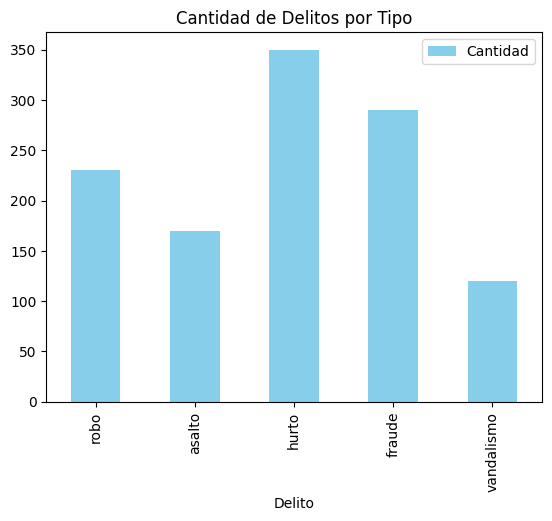

In [5]:
df.plot(kind='bar', x='Delito', y='Cantidad', color='skyblue')
plt.title('Cantidad de Delitos por Tipo')

([<matplotlib.patches.Wedge at 0x2215e13d5d0>,
 [Text(-1.0968887502901967, 0.08267447905376114, 'robo'),
  Text(-0.586835689075955, -0.9303890981878223, 'asalto'),
  Text(0.8231933675039993, -0.7296250267756896, 'hurto'),
  Text(0.5868353859166755, 0.9303892894031114, 'fraude'),
  Text(-0.5727727189808418, 0.9391120339934388, 'vandalismo')],
 [Text(-0.5983029547037436, 0.04509517039296062, '19.8%'),
  Text(-0.3200921940414299, -0.5074849626479031, '14.7%'),
  Text(0.4490145640930905, -0.3979772873321943, '30.2%'),
  Text(0.32009202868182296, 0.5074850669471517, '25.0%'),
  Text(-0.31242148308045914, 0.5122429276327847, '10.3%')])

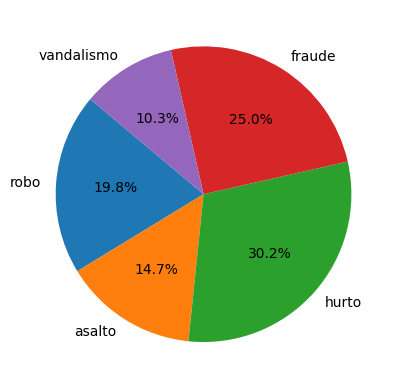

In [6]:
plt.pie(df['Cantidad'], labels=df['Delito'], autopct='%1.1f%%', startangle=140)

Con la funcion Describe se podran obtener informacion basicad del DF

In [7]:
df.describe()

,Cantidad
count,5.000000
mean,232.000000
std,91.760558
min,120.000000
25%,170.000000
50%,230.000000
75%,290.000000
max,350.000000


In [2]:
nombres = ["Mario", "Juan", "Andres", "Dario", "Sofía"]

edades = [20, 30, 21, 18, 24]

datos_personas = list(zip(nombres, edades))

df_personas = pd.DataFrame(data=datos_personas, columns=['Nombre', 'Edad'])
print(df_personas)

   Nombre  Edad
0   Mario    20
1    Juan    30
2  Andres    21
3   Dario    18
4   Sofía    24


Connvertir DF a CSV

In [13]:
df.to_csv('delitos.csv', index=False, header=False)
#df.to_excel('delitos.xlsx', index=False, header=True)

Leer el CSV

In [14]:
df=pd.read_csv('delitos.csv', names=['Delito', 'Cantidad'])
print(df)

       Delito  Cantidad
0        robo       230
1      asalto       170
2       hurto       350
3      fraude       290
4  vandalismo       120


Con  base de datos

In [ ]:
import pymysql
from sqlalchemy import create_engine

usuario='root'
password=''
host='localhost'
port='3600'

conexion_str='mysql+pymysql://root:@127.0.0.1:3306/pruebapandas'
try:
    engine=create_engine(conexion_str)
    conexion=engine.connect()
    conexion.close()
    print("Si funciona")
except Exception as e:
    print(f"Error al conectar a Mysql:{e}")




Si funciona


In [5]:
sql="select * from datos1"
conexion_str='mysql+pymysql://root:@127.0.0.1:3306/pruebapandas'
conexion=create_engine(conexion_str)
df_sql=pd.read_sql_query(sql, con=conexion)
df_sql

,index,Estados,Status,NumClen,Fecha
0,0,JAL,3,44,2010-01-04
1,1,JAL,3,66,2010-01-11
2,2,MEX,3,91,2010-01-18
3,3,MOR,1,65,2010-01-25
4,4,MIC,1,96,2010-02-01
...,...,...,...,...,...
2291,2291,MEX,1,91,2020-11-30
2292,2292,GRO,2,71,2020-12-07
2293,2293,MOR,3,40,2020-12-14
2294,2294,GTO,3,66,2020-12-21


In [ ]:
tienda={'X':[1,2,3,4,1], 'Y':[5,2,3,2,0], 'Z':[2,2,5,7,1]}
df=pd.DataFrame(data=tienda)
print(df)

   x  y  z
0  1  5  2
1  2  2  2
2  3  3  5
3  4  2  7
4  1  0  1


In [ ]:
#Crear una tabla en la BD desde un DF
df.to_sql(name='tienda', con=conexion, if_exists='replace', index=False)

5

In [12]:
df_titanic=pd.read_csv('../data/titanic.csv')
print(df_titanic)

#Mandar el csv a la BD
df_titanic.to_sql(name="titanic", con=conexion, if_exists='replace', index=False)

     Survived  Pclass                                               Name  \
0           0       3                             Mr. Owen Harris Braund   
1           1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2           1       3                              Miss. Laina Heikkinen   
3           1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4           0       3                            Mr. William Henry Allen   
..        ...     ...                                                ...   
882         0       2                               Rev. Juozas Montvila   
883         1       1                        Miss. Margaret Edith Graham   
884         0       3                     Miss. Catherine Helen Johnston   
885         1       1                               Mr. Karl Howell Behr   
886         0       3                                 Mr. Patrick Dooley   

        Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0      m

887